TFM DETECTOR DE CANCER DE MAMA CARLOS ALBALAT HEREDIA

Importando librerias

In [1]:
#Tratar datos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#Algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, IsolationForest

#Metricas
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
from sklearn.pipeline import Pipeline


Voy a comenzar con la exploración de los datos.

In [2]:
cancer_df = pd.read_csv("C:/Users/carlo/OneDrive/Escritorio/TFM/data.csv")

Muestro los primeros valores del dataframe

In [3]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Muestro ahora los tipos de variables para ver cuales son numéricas y cuales son categóricas(la variable objetivo es categorica voy a tener que pasarlo a 0 y 1)

In [4]:
cancer_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Compruebo los nulos en el dataframe (la variable unnamed se va al mamaero y la columna id)

In [5]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
cancer_df.drop(['id', 'Unnamed: 32'], axis= 1, inplace=True)



In [7]:
cancer_df['diagnosis'].replace(('M', 'B'), (1,0), inplace=True)

Separo en mi X y mi Y

In [8]:
x , y = cancer_df.drop('diagnosis', axis = 1), cancer_df['diagnosis']

In [9]:
feature_cols = x.columns

In [10]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [12]:
feature_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
cancer_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Voy a mostrar un grafico para ver cuantos casos hay de cancer benignos y cuantos malignos.

In [14]:
sns.set_theme()

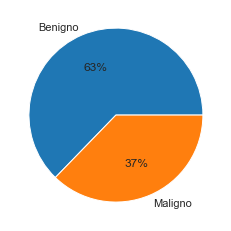

In [15]:
plt.pie(cancer_df['diagnosis'].value_counts(), labels=['Benigno', 'Maligno'], autopct='%.0f%%', colors= sns.color_palette('tab10'))
plt.show()

Ahora voy a mostrar histograma de cada variable respecto al a variable objetivo

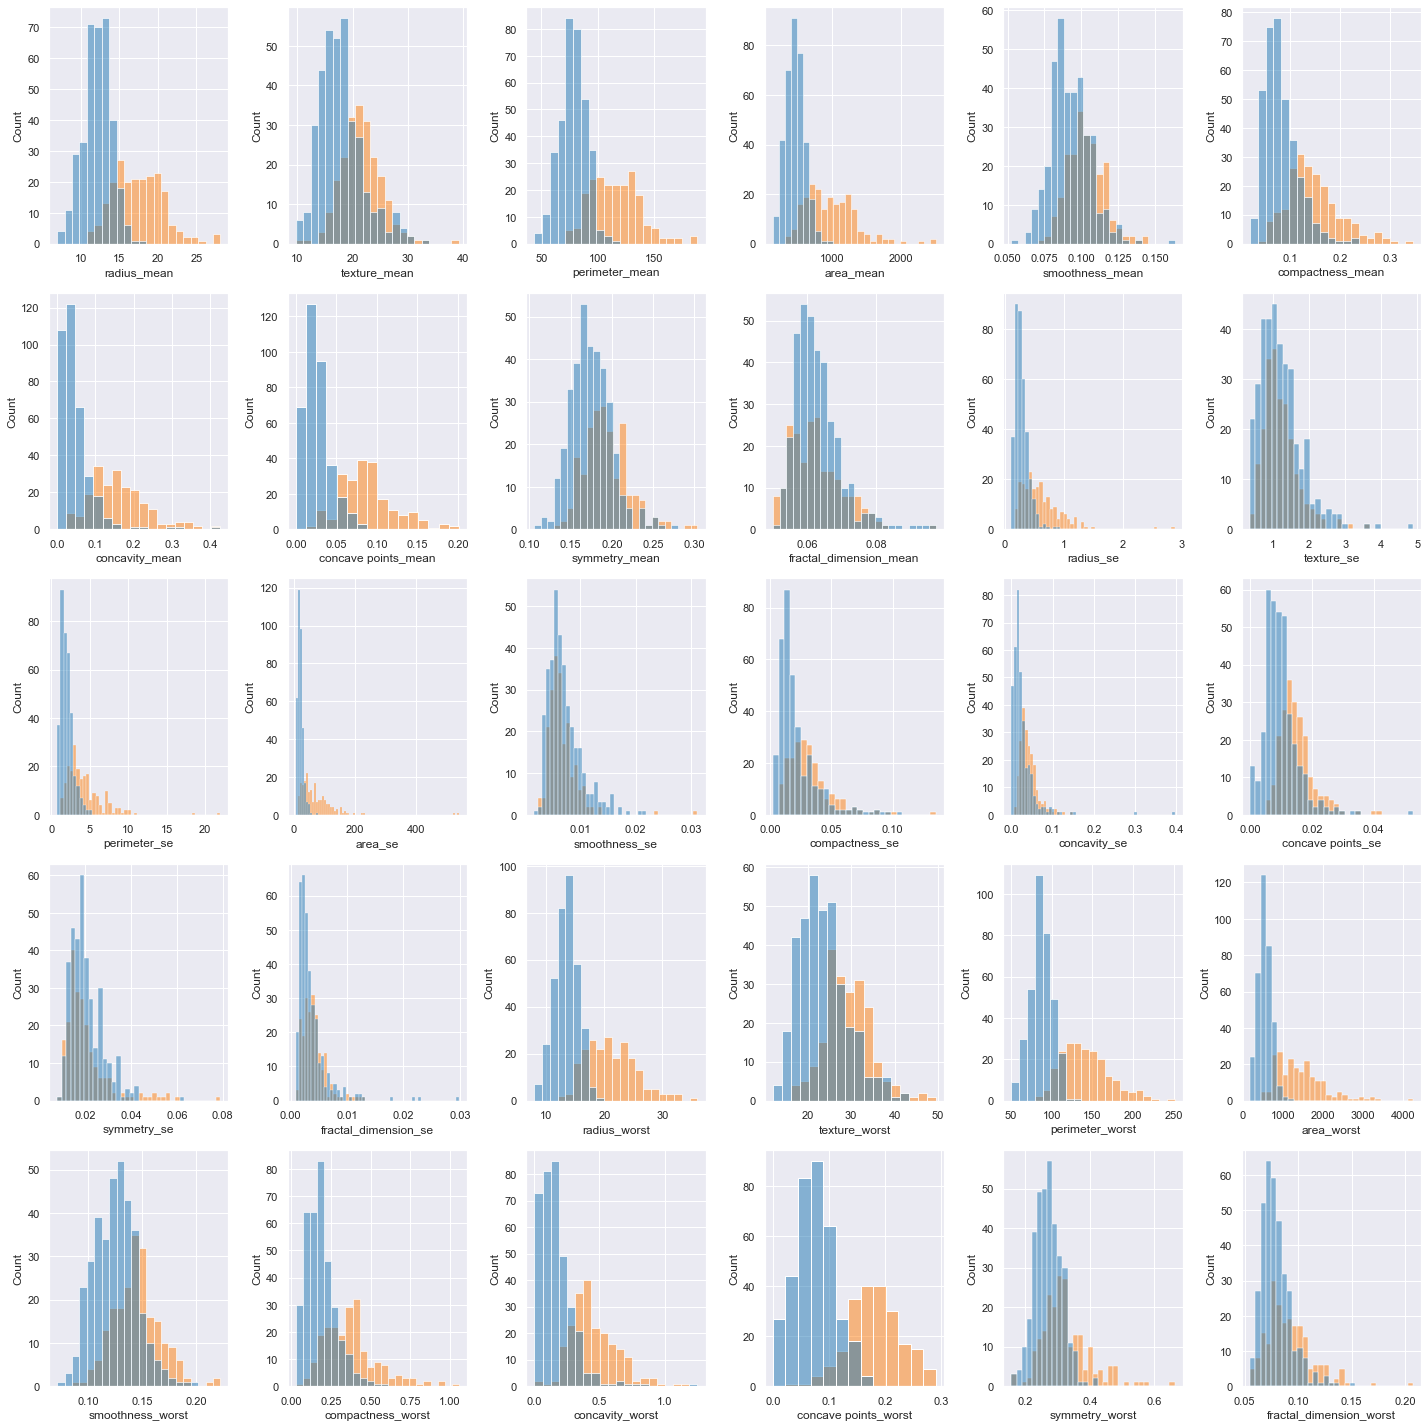

In [16]:
plt.subplots(figsize = (20,20))

count = 1

for i in feature_cols:
    plt.subplot(5,6,count)
    sns.histplot(data = cancer_df, hue = 'diagnosis', x = i, palette = 'tab10')\
                        .legend([],[], frameon = False)
    
    count += 1

plt.tight_layout()
plt.show()

Ahora voy a mostrar boxplots para hallar outliers

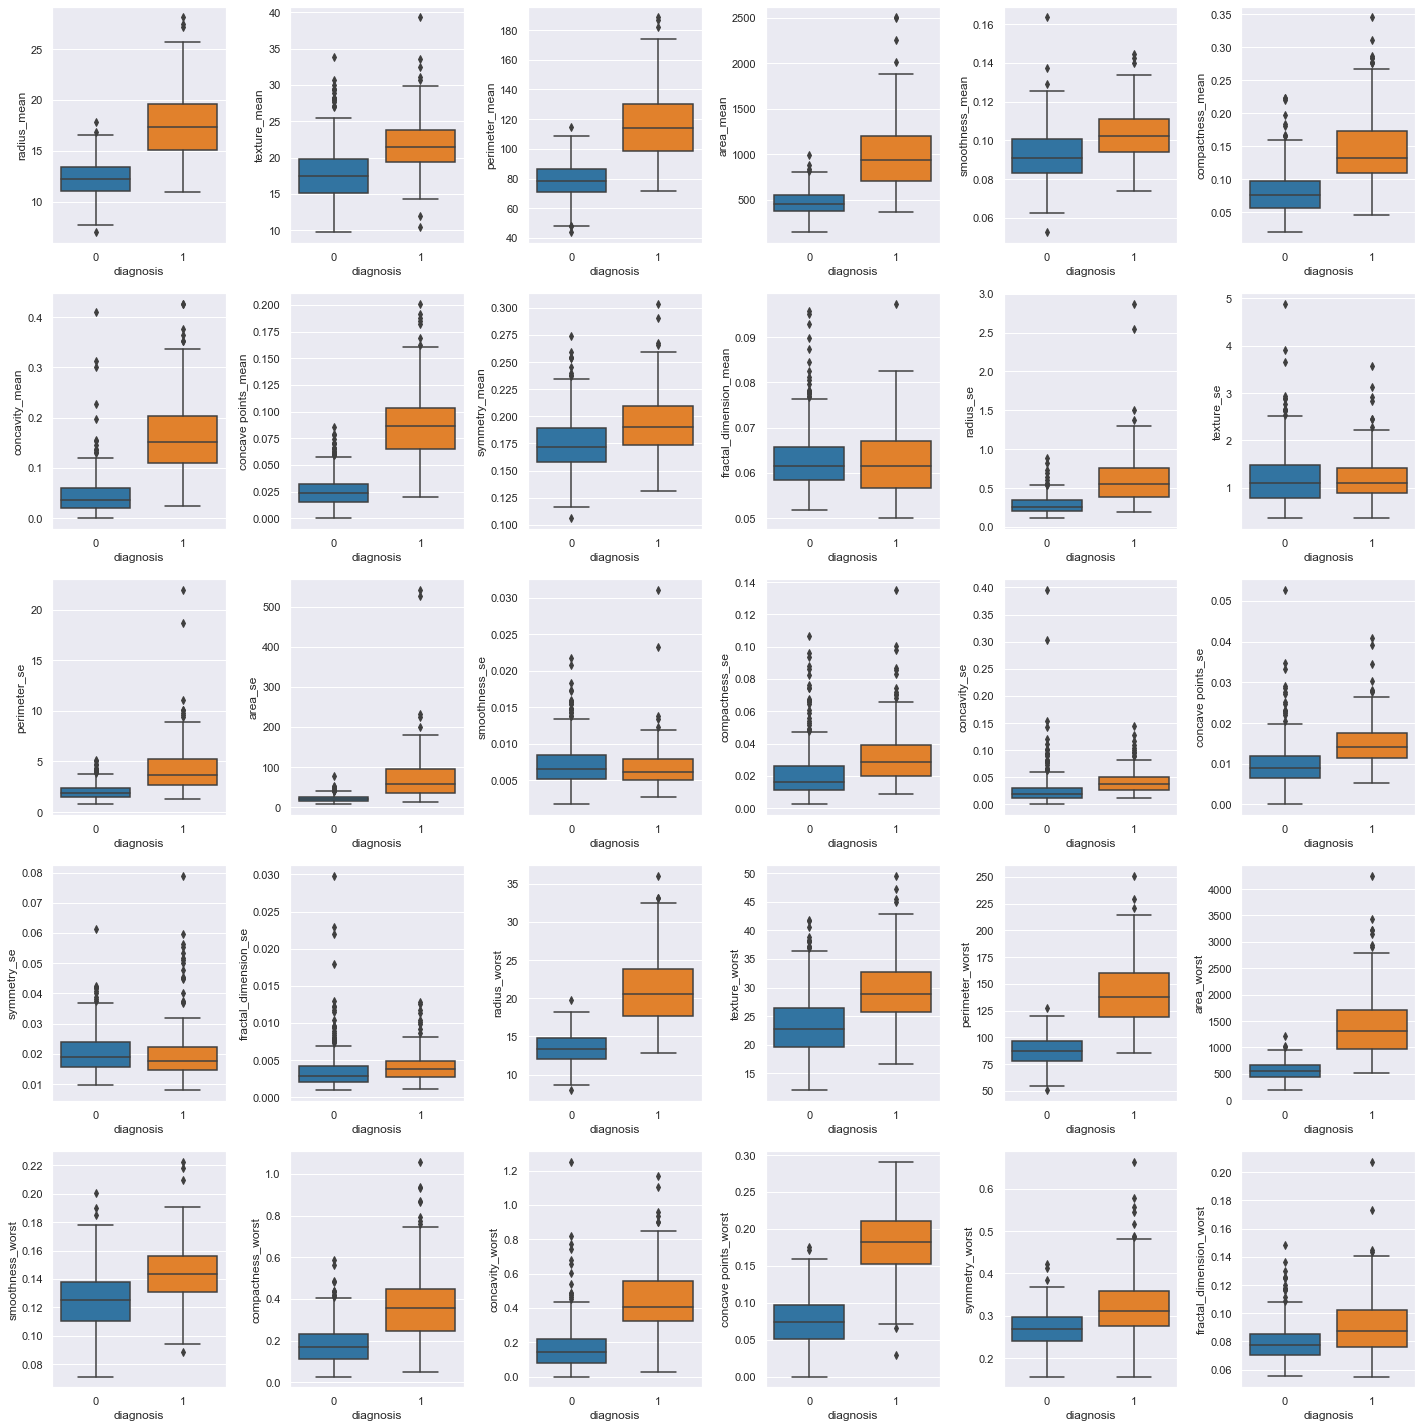

In [17]:
count = 1
plt.subplots(figsize = (20,20))

for i in feature_cols:
    plt.subplot(5,6,count)
    sns.boxplot(data = cancer_df, x = 'diagnosis', y = i, palette = 'tab10')
    
    count += 1

plt.tight_layout()
plt.show()

Parece que hay bien de outliers. (seguramente tendre que reescalar los datos para evitar estas entradas perjudiciales para el algoritmos)

Para asegurarme voy a mostrar violinplots (es necesario etiquetar antes!!!!)

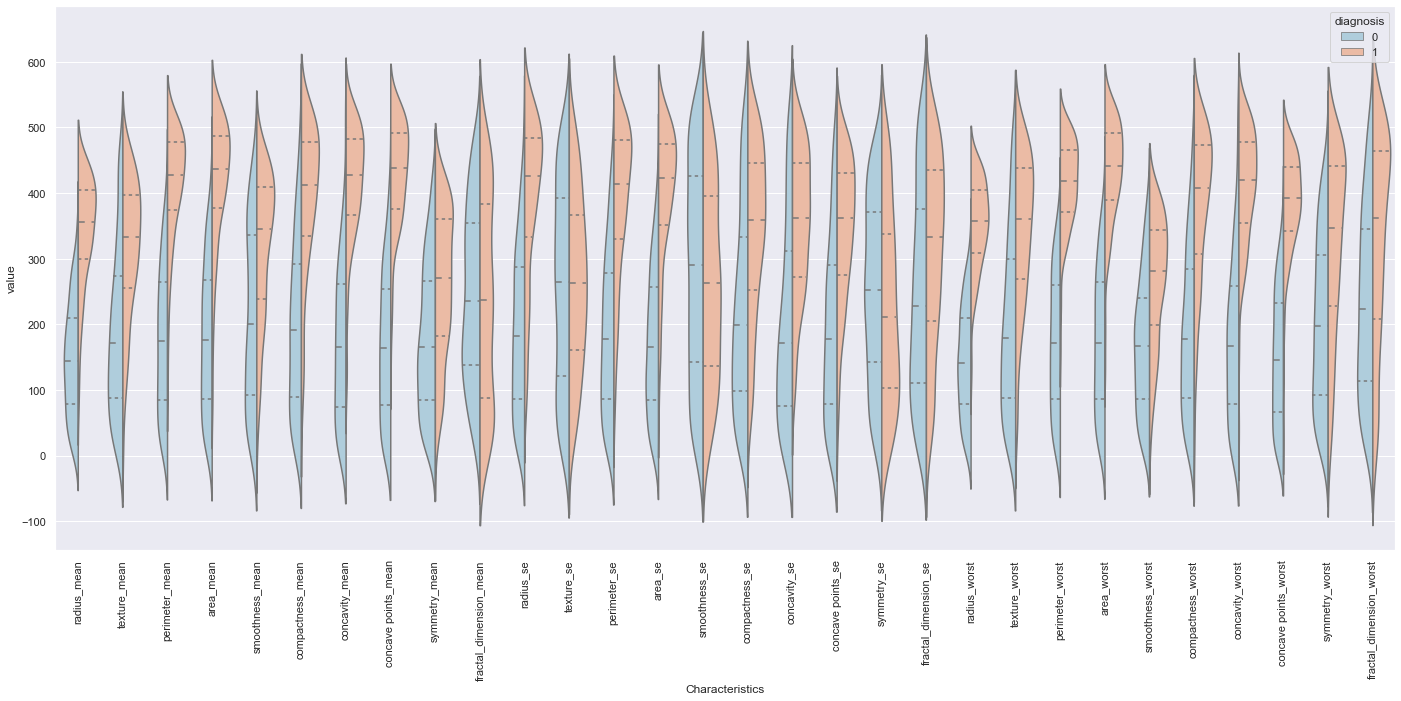

In [18]:
label_encoder = LabelEncoder()

cancer_df_encoded = cancer_df.copy()


for column in cancer_df_encoded.columns:
    cancer_df_encoded[column] = label_encoder.fit_transform(cancer_df_encoded[column])

df_div = pd.melt(cancer_df_encoded,
                    'diagnosis', var_name='Characteristics')

fig, ax = plt.subplots(figsize = (24,10))

violin = sns.violinplot(ax= ax, x = 'Characteristics', y = 'value',
                            hue='diagnosis', split=True, data=df_div,
                            inner= 'quartile', palette= 'RdBu_r')

df_no_objective = cancer_df.drop('diagnosis', axis=1)

violin.set_xticklabels(rotation = 90, labels = list(df_no_objective.columns))

sns.set(font_scale = 1.8)
plt.show()



COn el violinplot no se ve un pijote. (lefar seguramente) O mirar aquellas que en el boxplot parece que hay outliers y hacerle la media. (como en fractal_dimension_worst)

Ahora voy a forzar a que existan Outliers con IsolationForest para confirmar esto que he visto. 

In [19]:
isolation = IsolationForest(random_state=7)

isolation.fit(x)

pred_isolation = isolation.predict(x)

x['anomaly'] = pred_isolation

outliers = x.loc[x['anomaly'] == -1]
outliers_index = list(outliers.index)

print(x['anomaly'].value_counts())

 1    517
-1     52
Name: anomaly, dtype: int64


Considera que hay 64 valores extraños.

Puedo mostrar los outliers en 3D como hice para el modulo 2. TODO

- Usar una PCA de 3 componentes minimo
- normalizar los valores sino no tiene sentido
- Definir que es un inlier para mi
- Definir que es un outlier para mi
- Mostrarlo como me salda del nepe

Ahora voy a mostrar la correlación del dataframe, a ver si alguna variable tiene buena correalcion con la variable objetivo.

In [20]:
cancer_df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [21]:
cancer_df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

Hay bastante buena correalcion de variables variables con la variable objetivo.

Algo importante tambien es que hay varias variables que entre si tienen un 0.99 de correlacion, esto quiere decir que dicen lo mismo. Por lo que aplicar una PCA puede ser buena idea.*****

DATOS ANALIZADOS ------> FEATURE ENGINEERING

Voy a usar robust scaler para escalar los datos y prevenir el impacto de los datos extraños en el modelo

In [22]:
scaler = RobustScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,anomaly
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.185611,0.079867,0.198031,0.286394,0.025900,0.178848,0.269521,0.287188,0.058043,0.149360,...,0.030929,0.232531,0.341275,0.036347,0.220766,0.169480,0.152133,0.116675,0.189419,-0.182777
std,0.863737,0.763950,0.839923,0.971065,0.742954,0.806548,0.788212,0.722720,0.811073,0.838523,...,0.711372,0.813818,1.001155,0.776613,0.819888,0.777289,0.681376,0.916555,0.875910,0.576828
min,-1.565931,-1.621670,-1.467335,-1.124724,-2.284205,-1.118662,-0.608464,-0.623952,-2.165680,-1.375297,...,-1.549769,-1.144345,-0.881484,-2.045238,-0.962011,-0.844635,-1.035866,-1.862222,-1.212415,-2.000000
25%,-0.409314,-0.474245,-0.382648,-0.360927,-0.501849,-0.423183,-0.316195,-0.245670,-0.511834,-0.456057,...,-0.501157,-0.328167,-0.301037,-0.500000,-0.337155,-0.418033,-0.362807,-0.471111,-0.416101,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.590686,0.525755,0.617352,0.639073,0.498151,0.576817,0.683805,0.754330,0.488166,0.543943,...,0.498843,0.671833,0.698963,0.500000,0.662845,0.581967,0.637193,0.528889,0.583899,0.000000
max,3.612745,3.630551,3.534739,5.380519,3.567353,3.860263,3.611430,3.123487,3.692308,4.263658,...,2.792824,3.718576,6.273079,3.105442,4.409067,3.820045,1.980616,5.653333,6.181377,0.000000


Voy a aplicar PCA a ver cual es el minimo valor de PCA que explique de mejor manera el significado de los datos

In [23]:
pca20 = PCA(n_components=20)
principal_components = pca20.fit_transform(x_scaled)

voy a montarme uun grafico para ver el numero minimo de componentes de la pca. Grafica del codo vaya

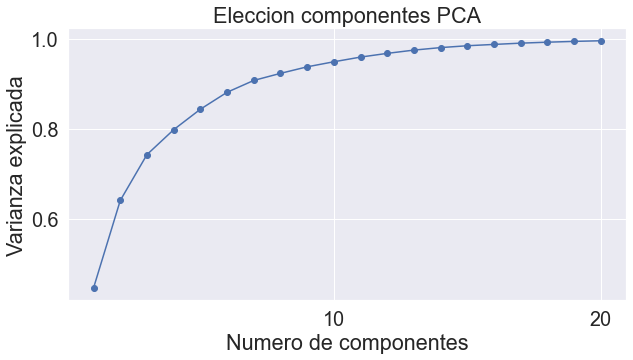

In [24]:
figure = plt.figure(figsize=(10,5))

plt.plot(range(1,21), pca20.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicada')
plt.title('Eleccion componentes PCA')
plt.locator_params(axis='x', nbins = 4)

plt.grid(True)
plt.show()

A partir de 7 componentes ya se llega al 0.9 de varianza explicada. De ahi parriba no es worth, se gana muy poca varianza.

Ahora divido en train y test los datos ya escalados con RobustScaler y tras eso, voy a aplicarle una pca de 7 componentes a los datos.

TRAIN TEST SPLIT

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [26]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,anomaly
204,-0.220588,-0.042629,-0.178016,-0.190949,0.199683,0.201130,0.183014,0.087726,0.393491,0.260095,...,-0.089120,-0.038992,-0.015122,0.384354,0.134966,0.150522,0.016274,0.284444,0.361785,0.0
70,1.365196,0.438721,1.291393,1.597406,-0.305335,0.156842,0.459363,0.856957,-0.621302,-0.823040,...,0.135417,1.652700,2.074028,-0.408163,0.113080,0.156483,0.818596,-0.401481,-0.686227,0.0
131,0.512255,0.113677,0.534393,0.545806,0.704173,0.453115,0.841012,0.882287,0.411243,-0.425178,...,0.068287,0.659724,0.825567,0.792517,0.143304,0.567809,0.533534,0.022222,0.007274,0.0
431,-0.237745,-0.206039,-0.164881,-0.229857,0.503434,0.595144,0.156911,-0.102626,0.056213,1.125891,...,-0.289352,-0.194962,-0.300158,0.465986,0.265763,0.050671,-0.271898,-0.394074,0.657129,0.0
540,-0.448529,-0.781528,-0.400622,-0.408940,0.209720,0.295816,0.057643,-0.140808,0.076923,0.745843,...,-0.663194,-0.457254,-0.402145,0.108844,-0.000521,-0.175112,-0.318752,-0.730370,0.063046,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-0.144608,-0.417407,-0.168337,-0.134106,0.128896,-0.615302,-0.247281,-0.090520,-0.597633,-0.595012,...,-0.653935,-0.290385,-0.231405,-0.057823,-0.736269,-0.457526,-0.426143,-0.650370,-0.773036,0.0
542,0.335784,1.168739,0.292430,0.324227,-0.693080,-0.312920,-0.202590,-0.060160,0.142012,-0.562945,...,0.796296,0.235892,0.246000,-0.860544,-0.387181,-0.244411,0.099202,-0.148148,-0.508244,0.0
176,-0.849510,-0.138544,-0.748012,-0.686258,0.059165,0.561546,0.683805,0.068169,-0.363905,2.330166,...,-0.118056,-0.595544,-0.521013,-0.040816,0.433038,0.454173,-0.008604,-0.308148,1.753637,0.0
501,0.110294,1.003552,0.210508,0.123620,1.073957,1.152566,0.733241,0.634941,1.428994,1.286223,...,0.871528,0.201986,0.178477,1.636054,0.962480,0.415052,0.540790,1.228148,1.855480,0.0


In [27]:
pca7 = PCA(n_components=7)

pca_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7']

x_train_pca = pd.DataFrame(pca7.fit_transform(x_train), columns = pca_columns)



In [28]:
x_test_pca = pd.DataFrame(pca7.fit_transform(x_test), columns = pca_columns)